In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [184]:
content=pd.read_csv('Content (1).csv')
content=content.iloc[: , 1:] #drop first column
content.Type.unique()
content.Category.unique()
content['Category'] = content['Category'].str.replace('"', '')
content['Category'] = content['Category'].str.capitalize()
content.head(3)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,Healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,Healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [163]:
reactions.isnull().sum()
reactions=reactions.dropna(subset=['Type'])

In [67]:
location=pd.read_csv('Location (1).csv')
location=location.iloc[: , 1:]
location.head(3)
location.isnull().sum()

User ID    0
Address    0
dtype: int64

In [68]:
profile=pd.read_csv('Profile (1).csv')
profile=profile.iloc[: , 1:]
profile.head(3)
profile.isnull().sum()

User ID      0
Interests    0
Age          0
dtype: int64

In [86]:
reactions=pd.read_csv('Reactions (1).csv')
reactions=reactions.iloc[: , 1:]
reactions.isnull().sum()
reactions=reactions.dropna(subset=['Type'])

In [151]:
reactions.head(3)


,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58


In [61]:
reaction_types=pd.read_csv('ReactionTypes (1).csv')
reaction_types=reaction_types.iloc[: , 1:]
reaction_types.isnull().sum()

Type         0
Sentiment    0
Score        0
dtype: int64

In [152]:
reaction_types.head(3)


,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


In [69]:
session=pd.read_csv('Session (1).csv')
session=session.iloc[: , 1:]
session.head(3)
session.isnull().sum()

User ID     0
Device      0
Duration    0
dtype: int64

In [70]:
user=pd.read_csv('User (1).csv')
user=user.iloc[: , 1:]
user.head()
user.isnull().sum()

User ID    0
Name       0
Email      0
dtype: int64

In [ ]:
# - An audit of their big data practice
# - Recommendations for a successful IPO
# - An analysis of their content categories 
# that highlights the top 5 categories with the largest aggregate popularity

In [185]:
reactions_content=pd.DataFrame()
reaction_content=pd.merge(reactions,content,on='Content ID',how='left')

In [186]:
reaction_content=reaction_content.rename(columns = {'Type_x':'Type',
                                                    'Type_y':'Content_Type',
                                                    'User ID_y':'User ID'})
reaction_content = reaction_content.iloc[: , :-1]
reaction_content = reaction_content.drop(reaction_content.columns[[1]],axis = 1)
reaction_content.head()

,Content ID,Type,Datetime,User ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying


In [187]:
model_full=pd.merge(reaction_content,reaction_types,on='Type',how='left')

In [188]:
model_full=model_full.rename(columns = {'Type':'Reaction Type'})
model_full.head(3)

,Content ID,Reaction Type,Datetime,User ID,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,negative,15


In [204]:
# popularity=model_full.groupby(['Category']).sum()
# top_5=popularity.sort_values('Category',ascending='False')
popularity=model_full.groupby(['Category'])['Score'].sum().sort_values(ascending=False)

In [256]:
top5=popularity.head(5)
top5

Category
Animals           74965
Science           71168
Healthy eating    69339
Technology        68738
Food              66676
Name: Score, dtype: int64

<AxesSubplot:title={'center':'Top 5 Categories by Popularity Score Aggregation'}, ylabel='Categories'>

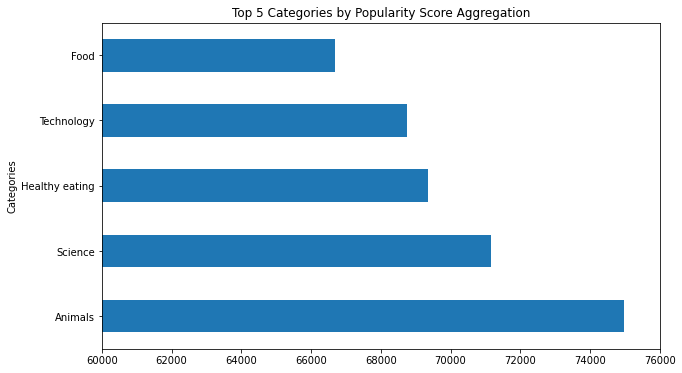

In [257]:
top5.plot(kind='barh', 
          title='Top 5 Categories by Popularity Score Aggregation', 
          ylabel='Aggregated Popularity Score',
          xlabel='Categories',
          xlim=(60000,76000),
          figsize=(10, 6))

<AxesSubplot:title={'center':'Top 5 Categories by Popularity Score Aggregation'}>

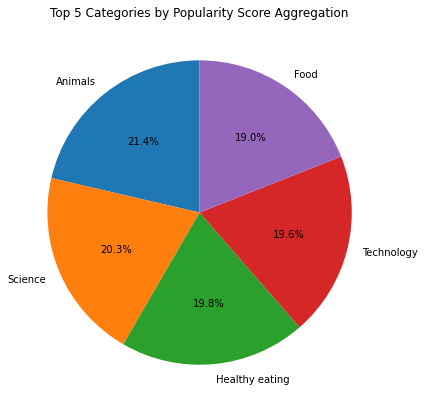

In [275]:
top5.plot.pie(title='Top 5 Categories by Popularity Score Aggregation', 
              ylabel='',
              startangle=90,
              autopct='%1.1f%%', 
              figsize=(12, 7))